# Wczytywanie danych

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np

# Przygotowanie nagłówków tabeli
column_names = ['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA',
            'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES',
            'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME', 'HISTOLOGY']

# Wczytywanie danych
data = pd.read_csv('hepatitis.data', delimiter=',', names=column_names)


# Wyświetlenie pierwszych 10 instancji
data.head(10)

# Podział na klasy i atrybuty
X = data.drop('Class', axis=1)
y = data['Class']

X

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


# Wstawianie brakujących danych

In [2]:
from sklearn.impute import SimpleImputer

# wstawianie nowych danych metodą najczęściej występujących
imr = SimpleImputer(missing_values='?', strategy='most_frequent')
imt = imr.fit(X)
X = pd.DataFrame(imr.transform(X), columns=X.columns)

X

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,100,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,100,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,100,1
3,31,1,2,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,85,200,4.0,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,85,242,3.3,50,2
151,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,100,2
152,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,100,2
153,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


# Kodowanie cech nominalnych

In [3]:
# tworzenie cech "gorącojedynkowych" z wybranych kolumn
dummies = pd.get_dummies(X[['SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA',
            'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES',
            'HISTOLOGY']])
# połączenie nowych cech ze starymi (niekodowanymi wcześniej)
X = pd.concat([X[['AGE', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME']], dummies], axis=1)

# Selekcja cech

In [4]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

# rank_range - ilość cech w rankingu
rank_range = 10

# obiekt selekcji cech
selector = SelectKBest(chi2, k=rank_range)

# wybór cech
selector.fit(X, y)

# indeksy wybranych kolumn
cols = selector.get_support(indices=True)

# nowy zbiór w postaci DataFrame
features_df_new = X.iloc[:,cols]
features_df_new

# sortowanie zbioru pod względem parametru score
scores = selector.scores_
pvalues = selector.pvalues_
zipped_list = [[float(s), str(f), int(i), float(p)] for s, f, i, p in zip(scores, features_df_new.columns, cols, pvalues)]
zipped_list = sorted(zipped_list, key= lambda x: x[0], reverse=True)

# posortowane wyniki
zipped_list_scores = list(np.array(zipped_list)[:,0].astype(np.float))
zipped_list_columns = list(np.array(zipped_list)[:,1])
zipped_list_indexes = list(np.array(zipped_list)[:,2].astype(np.int))
zipped_list_pvalues = list(np.array(zipped_list)[:,3].astype(np.float))


# odwracanie
# zipped_list_scores.reverse()
# zipped_list_columns.reverse()
# zipped_list_indexes.reverse()
# zipped_list_pvalues.reverse()

print(zipped_list_scores)


# posortowany zbiór w postaci DataFrame
X_sorted_df = features_df_new[zipped_list_columns]

# posortowany zbiór w postaci np
X_sorted_np = np.array(X_sorted_df)


[54.32671060726418, 52.749294672932066, 52.609496107134675, 30.669114159891592, 28.474819194490486, 4.16260162601626, 3.200179875143228, 1.491709456568251, 1.4350622620150242, 0.4791483886061891]


In [5]:
shortcut_array = [x[:3] for x in zipped_list_columns[:]]
print(shortcut_array)

['SGO', 'MAL', 'ALK', 'BIL', 'AGE', 'ASC', 'PRO', 'VAR', 'HIS', 'SPI']


<IPython.core.display.Javascript object>


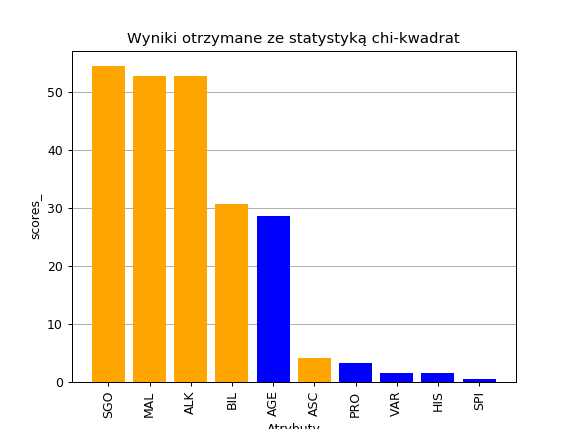

<BarContainer object of 10 artists>

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# rysowanie wykresu z wynikami


plt.figure("Wyniki otrzymane ze statystyką chi-kwadrat")
plt.title("Wyniki otrzymane ze statystyką chi-kwadrat")

# maska kolorów, podział na zakwalifikowane i niezakwalifikowane cechy
colors = ['orange' if col in zipped_list_columns else 'blue' for col in X.columns]



# rysowanie wykresu
ypos = np.arange(len(zipped_list_columns))
plt.ylabel("scores_")
plt.xlabel("Atrybuty")
plt.grid(axis='y', zorder=0)
plt.xticks(ypos, shortcut_array, rotation="vertical")
plt.bar(ypos, zipped_list_scores, label="scores_", zorder=2, color=colors)

<IPython.core.display.Javascript object>


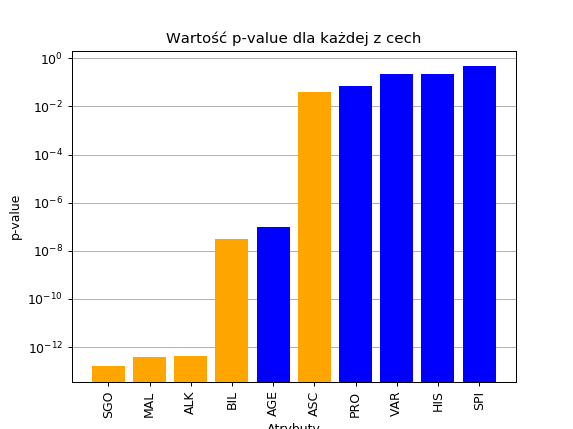

<BarContainer object of 10 artists>

In [7]:
# Rysowanie wykresu z wartościami p-value

plt.figure("Wartość p-value dla każdej z cech")
plt.title("Wartość p-value dla każdej z cech")


plt.ylabel("p-value")
plt.xlabel("Atrybuty")
plt.grid(axis='y', zorder=0)
plt.xticks(ypos, shortcut_array, rotation="vertical")
plt.yscale('log')
plt.bar(ypos, zipped_list_pvalues, label="p-value", zorder=2, color=colors)

# Standaryzacja wybranych danych

In [8]:
from sklearn.preprocessing import StandardScaler

## Obiekt odpowiedzialny za standaryzację
stdsc = StandardScaler()

# Ewaluacja klasyfikatora przez 5 razy powtórzoną 2-krotną walidacje krzyżową

In [9]:
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# lista w której zostaną zapisane wyniki
results = []

# proporcja podziału danych
n_splits = 2

# ilość iteracji walidacji krzyżowej
n_repeats = 5


# pętla określająca wartosć k dla algorytmu k-NN
for k in [1, 5, 10]:
    # pętla określająca używaną metrykę
    for metric in ['euclidean', 'minkowski']:
        
        # inicjalizacja klasyfikatora k-NN
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        
        # inicjalizacja obiektu do walidacji krzyżwej
        rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats)
        
        # pętla określająca ilosć użytych cech
        for num_of_features in range(1, rank_range):
            
            # inicjalizacja zmiennej zliczającej średnią dokładność klasyfikatora
            iteration_score = 0
            
            # standaryzacja wybranych cech
            X_sorted_np_std = stdsc.fit_transform(X_sorted_np[:,:num_of_features])
            
            # podział danych za pomocą 5 razy powtórzonej 2-krotnej walidacji krzyżowej
            splitted_data = rkf.split(X_sorted_np_std)
            
            # wyniki dla pojedyńczego folda
            fold_scores = []
            
            # pętla określająca próbki z walidacji krzyżowej
            for train_index, test_index in splitted_data:
                
                
                # przygotowanie danych trenujących i testowych
                X_train, X_test = X_sorted_np_std[train_index], X_sorted_np_std[test_index]
                y_train, y_test = y[train_index], y[test_index]
                
                # uczenie klasyfikatora za pomocą danych trenujących
                knn.fit(X_train, y_train)
                
                # wynik klasyfikatora
                score = knn.score(X_test, y_test)
                
                fold_scores.append(score)
                
                # zliczanie średniej dokładnośći
                iteration_score += (score / (n_splits*n_repeats))
            
            # dodawanie wyników do tabeli
            results.append([k, metric, num_of_features, iteration_score, fold_scores])
            
            

# konwersja tabeli do formatu DataFrame
results_df = pd.DataFrame(results, columns=['Parametr k', 'Metryka', 'Liczba cech', 'Dokładność','Wyniki'])

# zapis wyników do pliku
results_df.to_csv("results.csv", sep=";")

In [73]:
results_df

,Parametr k,Metryka,Liczba cech,Dokładność,Wyniki
0,1,euclidean,1,0.664502,"[0.7051282051282052, 0.6233766233766234, 0.653..."
1,1,euclidean,2,0.672111,"[0.7435897435897436, 0.6233766233766234, 0.666..."
2,1,euclidean,3,0.731518,"[0.7692307692307693, 0.7272727272727273, 0.756..."
3,1,euclidean,4,0.718681,"[0.7692307692307693, 0.7012987012987013, 0.730..."
4,1,euclidean,5,0.731652,"[0.7307692307692307, 0.7662337662337663, 0.730..."
5,1,euclidean,6,0.739277,"[0.7564102564102564, 0.7662337662337663, 0.730..."
6,1,euclidean,7,0.758775,"[0.7435897435897436, 0.8181818181818182, 0.692..."
7,1,euclidean,8,0.792241,"[0.8076923076923077, 0.7792207792207793, 0.756..."
8,1,euclidean,9,0.796154,"[0.7948717948717948, 0.7792207792207793, 0.794..."
9,1,minkowski,1,0.680037,"[0.717948717948718, 0.6753246753246753, 0.6282..."


# Wyniki

<IPython.core.display.Javascript object>


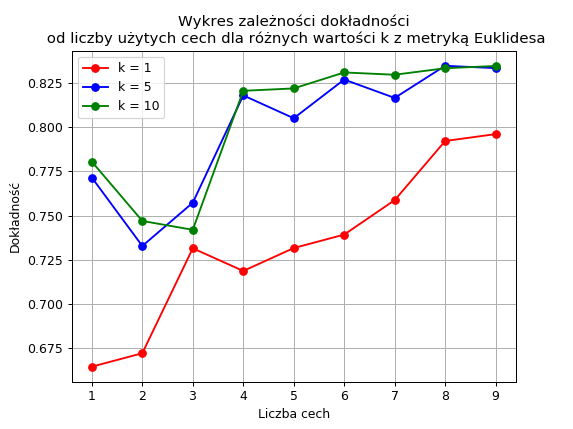

In [12]:
# Wykres zależności dokładności od liczby użytych cech dla różnych wartości k z metryką Euklidesa

plt.figure("Wykres zależności dokładności\n od liczby użytych cech dla różnych wartości k z metryką Euklidesa")
plt.title("Wykres zależności dokładności\n od liczby użytych cech dla różnych wartości k z metryką Euklidesa")

plt.ylabel('Dokładność')
plt.xlabel('Liczba cech')

plt.grid(zorder=0)

for col, k in zip(['red', 'blue', 'green'],[1, 5, 10]):
    plt.plot(np.arange(1,rank_range),
             results_df.loc[results_df['Parametr k'] == k].loc[results_df['Metryka'] == 'euclidean']['Dokładność'],
             marker='o', color=col, label=f"k = {k}")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


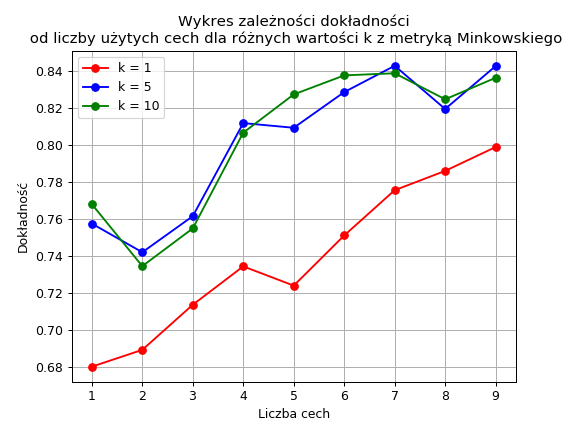

In [13]:
# Wykres zależności dokładności od liczby użytych cech dla różnych wartości k z metryką Minkowskiego

plt.figure("Wykres zależności dokładności\n od liczby użytych cech dla różnych wartości k z metryką Minkowskiego")
plt.title("Wykres zależności dokładności\n od liczby użytych cech dla różnych wartości k z metryką Minkowskiego")

plt.ylabel('Dokładność')
plt.xlabel('Liczba cech')

plt.grid(zorder=0)

for col, k in zip(['red', 'blue', 'green'],[1, 5, 10]):
    plt.plot(np.arange(1,rank_range),
             results_df.loc[results_df['Parametr k'] == k].loc[results_df['Metryka'] == 'minkowski']['Dokładność'],
             marker='o', color=col, label=f"k = {k}")
plt.legend()
plt.show()

# Macierz pomyłek dla najlepszego przypadku

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Szukanie najlepszej dokładnośći
best_score = results_df.loc[results_df['Dokładność'] == max(results_df['Dokładność'])]
print(f"Best score: {best_score}")

# Najlepsze parametry
k_best = int(best_score['Parametr k'])
metric_best = best_score['Metryka'].tolist()[0]
features_best = int(best_score['Liczba cech'])

# inicjalizacja nowego klasyfikatora z najlepszymi parametrami
best_knn = KNeighborsClassifier(n_neighbors=k_best, metric=metric_best)

# standaryzacja danych
X_best = stdsc.fit_transform(X_sorted_np[:,:features_best])

# przygotowanie poróbek uczących i testowych
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.5, random_state=1, stratify=y)

# dopasowanie klasyfikatora
best_knn.fit(X_train, y_train)

# użycie klasyfikatora na danych testowych, otrzymujemy wyniki klasyfikacji
y_predicted = best_knn.predict(X_test)

# tworzenie macierzy pomyłek
conf_matrix = confusion_matrix(y_test, y_predicted)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Actual T', 'Actual F'], index=['Predicted T', 'Predicted F'])
conf_matrix_df




Best score:     Parametr k    Metryka  Liczba cech  Dokładność  \
33           5  minkowski            7    0.842674   

                                               Wyniki  
33  [0.8589743589743589, 0.8311688311688312, 0.820...  


,Actual T,Actual F
Predicted T,5,11
Predicted F,1,61


# Analiza statystyczna

## Porównanie

In [74]:
import itertools as it
from scipy import stats

# lista wyników
results_temp = []

# pętla tworzy wszystkie możliwe kombinacje parametrów
for (k_0, metric_0, features_0, score_0, results_0), (k_1, metric_1, features_1,
                                                      score_1, results_1) in it.combinations(results, 2):
    # tworzenie etykiet tabeli
    classifier_0 = f"k = {k_0}, metryka = {metric_0}, liczba cech = {features_0}"
    classifier_1 = f"k = {k_1}, metryka = {metric_1}, liczba cech = {features_1}"
    
    # obliczanie statystyk
    k_stat, k_pval = stats.ttest_rel(results_0, results_1)
    
    # zapis
    results_temp.append([classifier_0, classifier_1, k_stat, k_pval])

In [49]:
# wyświetlenie wyników
stat_result_df = pd.DataFrame(results_temp,
                              columns=['klasyfikator_0', 'klasyfikator_1', 'statistic', 'pvalue'])
stat_result_df

,klasyfikator_0,klasyfikator_1,statistic,pvalue
0,"k = 1, metryka = euclidean, liczba cech = 1","k = 1, metryka = euclidean, liczba cech = 2",-0.463469,0.654032
1,"k = 1, metryka = euclidean, liczba cech = 1","k = 1, metryka = euclidean, liczba cech = 3",-5.677740,0.000303
2,"k = 1, metryka = euclidean, liczba cech = 1","k = 1, metryka = euclidean, liczba cech = 4",-4.562049,0.001362
3,"k = 1, metryka = euclidean, liczba cech = 1","k = 1, metryka = euclidean, liczba cech = 5",-4.866994,0.000887
4,"k = 1, metryka = euclidean, liczba cech = 1","k = 1, metryka = euclidean, liczba cech = 6",-5.447166,0.000407
...,...,...,...,...
1426,"k = 10, metryka = minkowski, liczba cech = 6","k = 10, metryka = minkowski, liczba cech = 8",0.991159,0.347506
1427,"k = 10, metryka = minkowski, liczba cech = 6","k = 10, metryka = minkowski, liczba cech = 9",0.293478,0.775812
1428,"k = 10, metryka = minkowski, liczba cech = 7","k = 10, metryka = minkowski, liczba cech = 8",0.985796,0.349992
1429,"k = 10, metryka = minkowski, liczba cech = 7","k = 10, metryka = minkowski, liczba cech = 9",0.206193,0.841229


## Przewaga

In [50]:
# lista wyników
advantage = []

# obliczenia
for index, (c_0, c_1, stat, pval) in stat_result_df.iterrows():
    if stat > 0:
        adv = 1
    else:
        stat = 0
        
    advantage.append([c_0, c_1, adv])

In [64]:
# wyświetlenie wyników
advantage_df = pd.DataFrame(advantage,
                              columns=['klasyfikator_0', 'klasyfikator_1', 'adv'])
advantage_df

,klasyfikator_0,klasyfikator_1,adv
0,"k = 1, metryka = euclidean, liczba cech = 1","k = 1, metryka = euclidean, liczba cech = 2",1
1,"k = 1, metryka = euclidean, liczba cech = 1","k = 1, metryka = euclidean, liczba cech = 3",1
2,"k = 1, metryka = euclidean, liczba cech = 1","k = 1, metryka = euclidean, liczba cech = 4",1
3,"k = 1, metryka = euclidean, liczba cech = 1","k = 1, metryka = euclidean, liczba cech = 5",1
4,"k = 1, metryka = euclidean, liczba cech = 1","k = 1, metryka = euclidean, liczba cech = 6",1
...,...,...,...
1426,"k = 10, metryka = minkowski, liczba cech = 6","k = 10, metryka = minkowski, liczba cech = 8",1
1427,"k = 10, metryka = minkowski, liczba cech = 6","k = 10, metryka = minkowski, liczba cech = 9",1
1428,"k = 10, metryka = minkowski, liczba cech = 7","k = 10, metryka = minkowski, liczba cech = 8",1
1429,"k = 10, metryka = minkowski, liczba cech = 7","k = 10, metryka = minkowski, liczba cech = 9",1


## Różnice statystycznie znaczące

In [65]:
# przyjęty poziom ufności
alpha = .05

# oblicznia
significance = []
for index, (c_0, c_1, stat, pval) in stat_result_df.iterrows():
    if pval <= alpha:
        sig = 1
    else:
        sig = 0
    
    significance.append([row[0], row[1], sig])
        

In [66]:
# wyświetlenie wyników
significance_df = pd.DataFrame(significance,
                              columns=['klasyfikator_0', 'klasyfikator_1', 'sig'])
significance_df

,klasyfikator_0,klasyfikator_1,sig
0,"k = 10, metryka = minkowski, liczba cech = 8","k = 10, metryka = minkowski, liczba cech = 9",0
1,"k = 10, metryka = minkowski, liczba cech = 8","k = 10, metryka = minkowski, liczba cech = 9",1
2,"k = 10, metryka = minkowski, liczba cech = 8","k = 10, metryka = minkowski, liczba cech = 9",1
3,"k = 10, metryka = minkowski, liczba cech = 8","k = 10, metryka = minkowski, liczba cech = 9",1
4,"k = 10, metryka = minkowski, liczba cech = 8","k = 10, metryka = minkowski, liczba cech = 9",1
...,...,...,...
1426,"k = 10, metryka = minkowski, liczba cech = 8","k = 10, metryka = minkowski, liczba cech = 9",0
1427,"k = 10, metryka = minkowski, liczba cech = 8","k = 10, metryka = minkowski, liczba cech = 9",0
1428,"k = 10, metryka = minkowski, liczba cech = 8","k = 10, metryka = minkowski, liczba cech = 9",0
1429,"k = 10, metryka = minkowski, liczba cech = 8","k = 10, metryka = minkowski, liczba cech = 9",0


## Wynik końcowy analizy statystycznej

In [75]:
stat_better_df = pd.concat([significance_df['klasyfikator_0'], significance_df['klasyfikator_1']], axis=1)
stat_better_df['Wynik statystyczne lepszy'] = significance_df['sig'] * advantage_df['adv']

stat_better_df


,klasyfikator_0,klasyfikator_1,Wynik statystyczne lepszy
0,"k = 10, metryka = minkowski, liczba cech = 8","k = 10, metryka = minkowski, liczba cech = 9",0
1,"k = 10, metryka = minkowski, liczba cech = 8","k = 10, metryka = minkowski, liczba cech = 9",1
2,"k = 10, metryka = minkowski, liczba cech = 8","k = 10, metryka = minkowski, liczba cech = 9",1
3,"k = 10, metryka = minkowski, liczba cech = 8","k = 10, metryka = minkowski, liczba cech = 9",1
4,"k = 10, metryka = minkowski, liczba cech = 8","k = 10, metryka = minkowski, liczba cech = 9",1
...,...,...,...
1426,"k = 10, metryka = minkowski, liczba cech = 8","k = 10, metryka = minkowski, liczba cech = 9",0
1427,"k = 10, metryka = minkowski, liczba cech = 8","k = 10, metryka = minkowski, liczba cech = 9",0
1428,"k = 10, metryka = minkowski, liczba cech = 8","k = 10, metryka = minkowski, liczba cech = 9",0
1429,"k = 10, metryka = minkowski, liczba cech = 8","k = 10, metryka = minkowski, liczba cech = 9",0
